# How to read the skytiles file

The file contains extensions with the number of the sky tile. For each extension, which can be read as tiles[n] with n the number of the sky tile, there is a different number of records containing the metadata of each sky cell. 

## Structure of file

In [34]:
import asdf
tiles = asdf.open("skytiles.asdf")
tiles.info()

root (AsdfObject)
├─asdf_library (Software) ...
├─history (dict) ...
├─0 (NDArrayType): shape=(2401,), dtype=void1920
├─1 (NDArrayType): shape=(2413,), dtype=void1920
├─2 (NDArrayType): shape=(2413,), dtype=void1920
├─3 (NDArrayType): shape=(2413,), dtype=void1920
├─4 (NDArrayType): shape=(2413,), dtype=void1920
├─5 (NDArrayType): shape=(2413,), dtype=void1920
├─6 (NDArrayType): shape=(2413,), dtype=void1920
├─7 (NDArrayType): shape=(2413,), dtype=void1920
├─8 (NDArrayType): shape=(2413,), dtype=void1920
├─9 (NDArrayType): shape=(2403,), dtype=void1920
├─10 (NDArrayType): shape=(2403,), dtype=void1920
├─11 (NDArrayType): shape=(2403,), dtype=void1920
├─12 (NDArrayType): shape=(2403,), dtype=void1920
├─13 (NDArrayType): shape=(2403,), dtype=void1920
├─14 (NDArrayType): shape=(2403,), dtype=void1920
├─15 (NDArrayType): shape=(2403,), dtype=void1920
├─16 (NDArrayType): shape=(2403,), dtype=void1920
├─17 (NDArrayType): shape=(2403,), dtype=void1920
├─18 (NDArrayType): shape=(2403,), dtype=

## Fields of sky cell metadata

In [2]:
print(tiles[0].dtype)

[('name', '<U16'), ('tile_index', '<i4'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('x_center', '<f4'), ('y_center', '<f4'), ('orientat', '<f4'), ('nx', '<i4'), ('ny', '<i4'), ('x0_projection', '<f8'), ('y0_projection', '<f8'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8'), ('pixel_scale', '<f4'), ('ra_projection_center', '<f8'), ('dec_projection_center', '<f8'), ('orientat_projection_center', '<f4'), ('ra_tile_min', '<f8'), ('ra_tile_max', '<f8'), ('dec_tile_min', '<f8'), ('dec_tile_max', '<f8')]


## Number of sky cells 

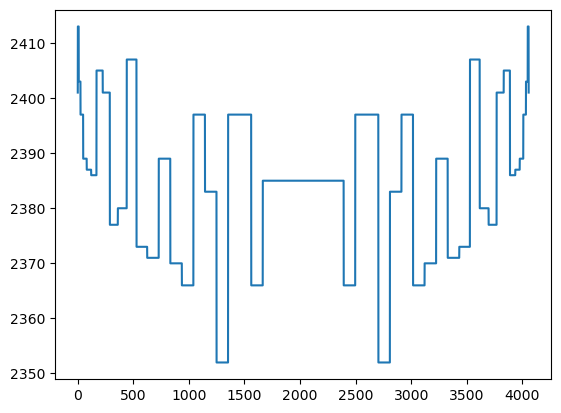

Median number of sky cells:  2385.0


In [3]:
# Number of sky cells for each sky tile
import matplotlib.pyplot as plt
import numpy as np
ntiles = len(tiles.keys())-2
lentiles = [len(tiles[i]) for i in range(ntiles)]
plt.plot(lentiles)
plt.show()
print('Median number of sky cells: ', np.median(lentiles))

## Contours in RA, Dec of sky cells for a give sky tile

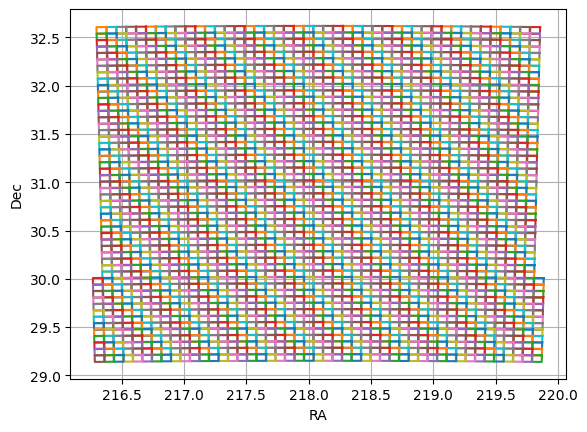

In [35]:
ncell = 1000
for c in tiles[ncell]:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1])
plt.grid()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

Taking into account the effect of declination and orientation ...

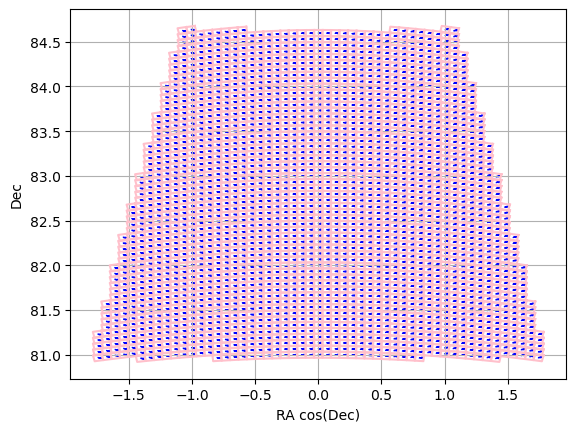

In [5]:
dd = 1./60
for c in tiles[ncell]:
    ac = c['ra_center']
    dc = c['dec_center']
    orient = (0 - c['orientat']) * np.pi/180
    cosfac = np.cos(dc * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    ac = (ac - c0) * cosfac + c0
    c1 = (c1 - c0) * cosfac + c0
    c2 = (c2 - c0) * cosfac + c0
    c3 = (c3 - c0) * cosfac + c0
    c4 = (c4 - c0) * cosfac + c0
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')
    dx = dd * np.cos(orient)
    dy = dd * np.sin(orient)
    plt.arrow(ac,dc,dx, dy,head_width=0.01, color='blue')
plt.grid()
plt.xlabel('RA cos(Dec)')
plt.ylabel('Dec')
#plt.xlim(224,226)
#plt.ylim(89,90)
plt.show()

### Polar cap

It is better to plot it in polar coordinates

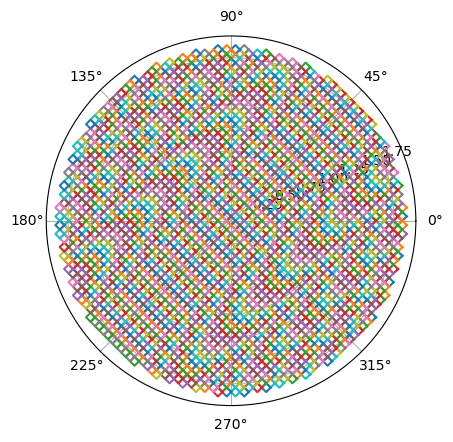

In [6]:
import numpy as np
ncell = 0
dd = 0.04
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for c in tiles[ncell]:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = 90-c['dec_corn1']
    d2 = 90-c['dec_corn2']
    d3 = 90-c['dec_corn3']
    d4 = 90-c['dec_corn4']
    ax.plot(np.array([c1, c2, c3, c4, c1])* np.pi/180,
            [d1, d2, d3, d4, d1])
    ac = c['ra_center']* np.pi/180
    dc = 90-c['dec_center']
    orient = (90 - c['orientat']) * np.pi/180
    #plt.arrow(ac,dc,0,-dd,head_width=0.01, color='blue')
             
plt.show()

## Reading information, field by field

In [7]:
nskytile = 10
nskycell = 100
tile = tiles[nskytile]
cell = tile[nskycell]
for field in tile.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(cell[field])))

 name                       a022dp83xp21yp17
 tile_index                 10
 ra_center                  32.0658758623
 dec_center                 81.5490259499
 x_center                   2500.0
 y_center                   2500.0
 orientat                   -9.565876
 nx                         5000
 ny                         5000
 x0_projection              -227592.94546890596
 y0_projection              -48211.64409128521
 ra_corn1                   32.3385851425
 dec_corn1                  81.577450381
 ra_corn2                   31.8710266844
 dec_corn2                  81.5889070579
 ra_corn3                   31.7949861232
 dec_corn3                  81.5204139273
 ra_corn4                   32.2588954318
 dec_corn4                  81.509051558
 pixel_scale                0.05
 ra_projection_center       22.5
 dec_projection_center      82.7980584505
 orientat_projection_center  0.0
 ra_tile_min                11.25
 ra_tile_max                33.75
 dec_tile_min               

# Check of astrometry

If I define the astrometry from the cell, can I recover the R.A. and Dec. values computed in the metadata from the tile astrometry ?

In [8]:
from astropy.wcs import WCS

nskytile = 1
nskycell = 10
tile = tiles[nskytile]
ntiles = len(tiles.keys())-2
c = tile[nskycell]

ac = c['ra_center']
dc = c['dec_center']
orient = c['orientat']

# Define the astrometry of the sky cell
wcs = WCS(naxis=2)
pix = c['pixel_scale']/3600
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [2500,2500]
wcs.wcs.crota = [0,orient]  # CROTA2 is the rotation angle

In [9]:
# Corners
x = [1,5000,5000,1]
y = [1,1,5000,5000]
a, d = wcs.wcs_pix2world(x, y, 1)

ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

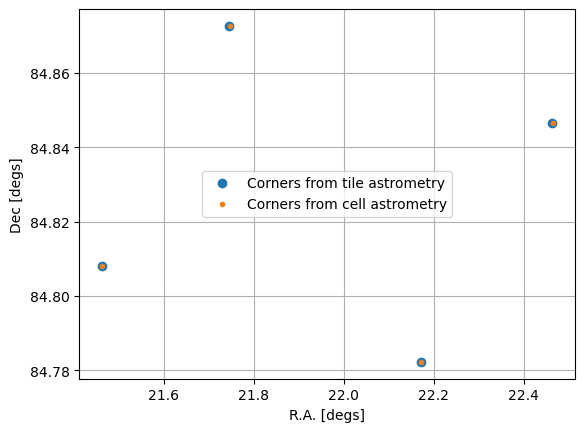

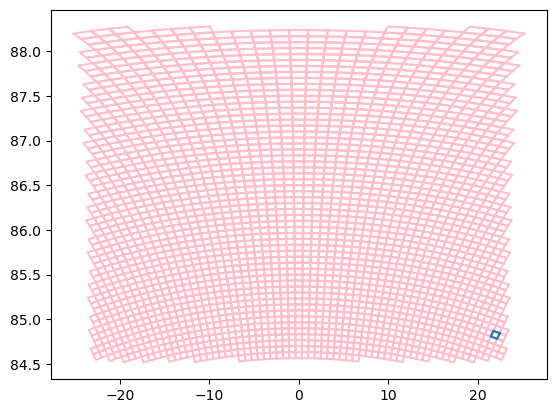

In [10]:
import matplotlib.pyplot as plt
plt.plot(ca, cd,'o',label='Corners from tile astrometry')
plt.plot( a ,d ,'.',label='Corners from cell astrometry')
plt.legend()
plt.grid()
plt.xlabel('R.A. [degs]')
plt.ylabel('Dec [degs]')
plt.show()


for c in tiles[nskytile]:
    c0 = c['ra_projection_center']
    ac = c['ra_center']
    dc = c['dec_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')

ca.append(ca[0])
cd.append(cd[0])
plt.plot(ca,cd)
plt.show()


# New format

In [162]:
import asdf
skymap = asdf.open("skymap.asdf")
skymap.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.2.1.dev54+g019c6a45
├─history (dict)
│ └─extensions (list)
│   └─[0] (ExtensionMetadata)
│     ├─extension_class (str): asdf.extension._manifest.ManifestExtension
│     ├─extension_uri (str): asdf://asdf-format.org/core/extensions/core-1.5.0
│     ├─manifest_software (Software)
│     │ ├─name (str): asdf_standard
│     │ └─version (str): 1.1.1
│     └─software (Software)
│       ├─name (str): asdf
│       └─version (str): 3.2.1.dev54+g019c6a45
├─skycells (NDArrayType): shape=(8045162,), dtype=void1536
└─skytiles (NDArrayType): shape=(4058,), dtype=void512


In [163]:
# Select cells in tile itile
tiles = skymap['skytiles']
itile = 20
tile = tiles[itile]
cells = skymap['skycells'][tile['cell_start']:tile['cell_end']]
c0 = tile['ra_tile_center']

print('cell start and end ', tile['cell_start'], tile['cell_end'])
print('tile center R.A. ', c0)
print('tile index ', np.unique(cells['tile_index']))

cell start and end  40004 42005
tile center R.A.  247.5
tile index  [20]


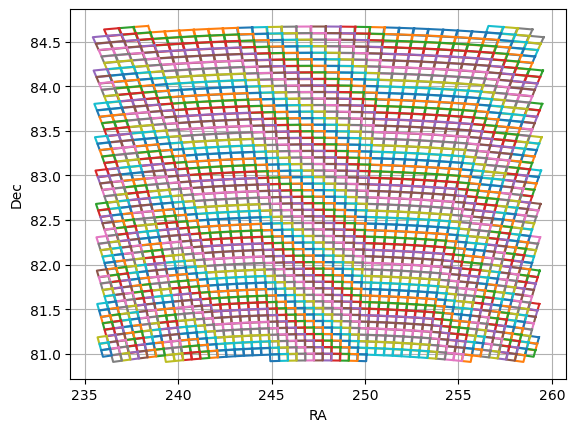

In [164]:
if itile in [0,len(tiles)]:
    dd = 0.04
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for c in cells:
        cosfac = np.cos(c['dec_corn1'] * np.pi/180)
        c1 = c['ra_corn1']
        c2 = c['ra_corn2']
        c3 = c['ra_corn3']
        c4 = c['ra_corn4']
        d1 = 90-c['dec_corn1']
        d2 = 90-c['dec_corn2']
        d3 = 90-c['dec_corn3']
        d4 = 90-c['dec_corn4']
        ax.plot(np.array([c1, c2, c3, c4, c1])* np.pi/180,
            [d1, d2, d3, d4, d1])
        ac = c['ra_center']* np.pi/180
        dc = 90-c['dec_center']
        orient = (90 - c['orientat']) * np.pi/180
else:
    fig, ax = plt.subplots()
    for c in cells:
        cosfac = np.cos(c['dec_corn1'] * np.pi/180)
        c1 = c['ra_corn1']
        c2 = c['ra_corn2']
        c3 = c['ra_corn3']
        c4 = c['ra_corn4']
        if c0  == 0:
            if c1 > 270:
                c1 -= 360
            if c2 > 270:
                c2 -= 360
            if c3 > 270:
                c3 -= 360
            if c4 > 270:
                c4 -= 360
        d1 = c['dec_corn1']
        d2 = c['dec_corn2']
        d3 = c['dec_corn3']
        d4 = c['dec_corn4']
        ax.plot([c1, c2, c3, c4, c1],
                 [d1, d2, d3, d4, d1])
    ax.grid()
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
plt.show()

## Astrometry check

In [358]:
import asdf
skymap = asdf.open("skymap.asdf")
tiles = skymap['skytiles']

In [369]:
from astropy.wcs import WCS
nskytile = 2
nskycell = 500
tile = tiles[nskytile]
cells =  skymap['skycells'][tile['cell_start']:tile['cell_end']]
print('cells ', len(cells))
c = cells[nskycell]

#ac, dc = c['ra_center'], c['dec_center']
#xc, yc = c['x_center'], c['y_center']
#orient = c['orientat']
ac, dc = tile['ra_tile_center'], tile['dec_tile_center']
xc, yc = c['x0_tile_center'], c['y0_tile_center']
orient = tile['orientat_tile']

print(ac, dc)

# Define the astrometry of the sky cell
wcs = WCS(naxis=2)
pix = tile['pixel_scale']
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [xc, yc]
#wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [5000,5000]
print(wcs)
print(c['ra_center'])

cells  2001
45.0 86.4008076303
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 45.0 86.4008076303 
CRPIX : 50499.5 -35900.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.5277777492883615e-05 1.5277777492883615e-05 
NAXIS : 5000  5000
31.3136139701


In [372]:
# Corners
ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

x = [ -0.5, 4999.5, 4999.5, -0.5]
y = [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)

xx,yy = wcs.wcs_world2pix(np.array(ca), np.array(cd), 0)
print('xx ', xx)
print('yy ', yy)
            
print('a - ca',(a - ca) * np.cos(dc * np.pi/180)/pix,' pixels')
print('d - cd',(d - cd) /pix, ' pixels')

xx  [-5.00942313e-01  4.99949915e+03  4.99949915e+03 -5.00940985e-01]
yy  [-4.99332997e-01 -4.99330340e-01  4.99950076e+03  4.99950077e+03]
a - ca [0.00123131 0.0011224  0.00117765 0.00129119]  pixels
d - cd [-0.00041584 -0.00046455 -0.00054977 -0.00050472]  pixels


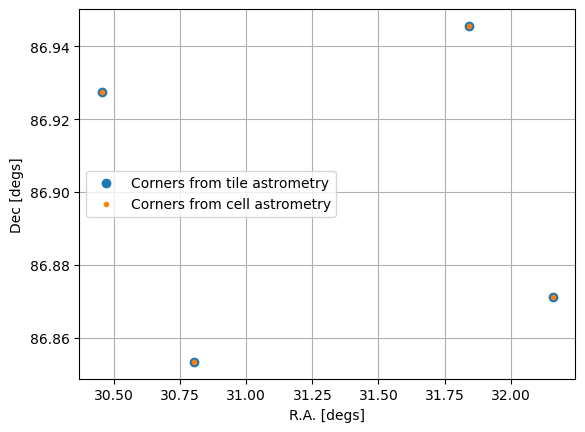

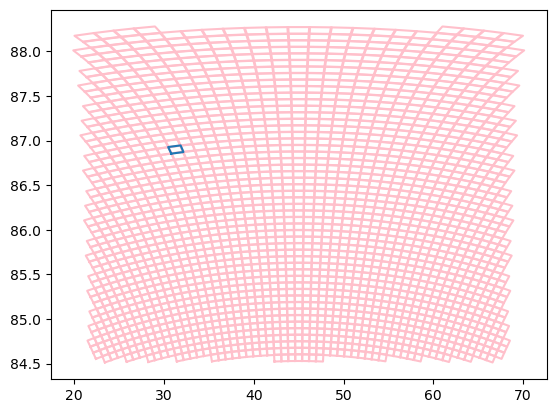

In [367]:
import matplotlib.pyplot as plt
plt.plot(ca, cd,'o',label='Corners from tile astrometry',)
plt.plot( a ,d ,'.',label='Corners from cell astrometry',)
plt.legend()
plt.grid()
plt.xlabel('R.A. [degs]')
plt.ylabel('Dec [degs]')
plt.show()


for c in cells:
    c0 = tile['ra_tile_center']
    ac = c['ra_center']
    dc = c['dec_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')

ca.append(ca[0])
cd.append(cd[0])
plt.plot(ca,cd)
plt.show()


In [178]:
5000*0.055

275.0